In [7]:
%pylab inline
import matplotlib.pyplot as plt
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','yellow','olive',
                                          'orange', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['pdf.compression'] = 0
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pandas.read_csv('../processeddata/20150514_293t_tc12_ps6k_plusminustorin1_3hours_richleuarg.csv')
print data

     samplelabel  mean_relativephosindex     stdev     sterr
0           Rich                1.000000  0.081855  0.047259
1           -Leu                0.113365  0.021518  0.012423
2           -Arg                0.289299  0.017429  0.010063
3  Rich + Torin1                0.014747  0.022780  0.013152
4  -Leu + Torin1                0.012652  0.019696  0.011371
5  -Arg + Torin1                0.009042  0.013333  0.007698


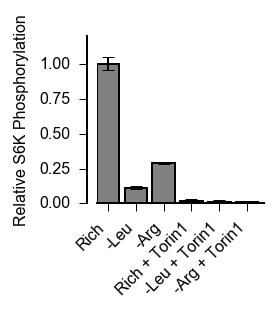

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([0,1,2,3,4,5])

xlocations = numpy.array([0,1,2,3,4,5])

ax.bar(xlocations, data['mean_relativephosindex'][sampleOrder], align='edge', color = 'grey' )
ax.errorbar(xlocations+0.4, data['mean_relativephosindex'][sampleOrder], 
            data['sterr'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

#ax.set_xlabel('Samples')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(data['samplelabel'][sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative S6K Phosphorylation')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/20150514_tc12_s6k_plusminustorin1_3hours_richleuarg.svg')
fig.savefig('../figures/20150514_tc12_s6k_plusminustorin1_3hours_richleuarg.png',bbox_inches='tight')
fig.savefig('../figures/20150514_tc12_s6k_plusminustorin1_3hours_richleuarg.pdf',bbox_inches='tight', pad_inches=0.1)